In [725]:
import matplotlib.pyplot as plt
import nest as sim
import numpy as np
sim.ResetKernel()

sim_len = 5500


srt_tm = 1000.
stp_tm = 4500.

In [726]:
def plotSpks(ax,t,s): # define function to plot spikes in a common way
    ax.plot(t,s,'.')
    ax.set_ylabel('Neuron')
    ax.set_xlabel('Time (ms)')
    ax.set_xlim([0,sim_len])

In [727]:
sim.SetDefaults("stdp_synapse",{"tau_plus": 15.0})


syn_dict = {"model": "stdp_synapse", "alpha": 1.0,"weight": 1000.,'Wmax':1500.,'delay': 1.}


# alpha_min = 0.1
# alpha_max = 2.
# w_min = 0.5
# w_max = 5.

# syn_dict = {"model": "stdp_synapse",
#             "alpha": {"distribution": "uniform", "low": alpha_min, "high": alpha_max},
#             "weight": {"distribution": "uniform", "low": w_min, "high": w_max},
#             "delay": 1.0}

In [728]:
n1 = sim.Create("iaf_psc_alpha",1, params={"tau_minus": 30.0})
n2 = sim.Create("iaf_psc_alpha",1, params={"tau_minus": 30.0})
n3 = sim.Create("iaf_psc_alpha",1)
n4 = sim.Create("iaf_psc_alpha",1)

In [729]:
sin = sim.Create('ac_generator ', 1, params = {'offset': 300.,'amplitude':695.,'frequency':5.,'phase': 0.,'start':srt_tm})
cos = sim.Create('ac_generator ', 1, params = {'offset': 300.,'amplitude':695.,'frequency':5.,'phase': 180.,'start':srt_tm})
sin2 = sim.Create('ac_generator ', 1, params = {'offset': 250.,'amplitude':295.,'frequency':5.,'phase': 0.,'stop':stp_tm})
cos2 = sim.Create('ac_generator ', 1, params = {'offset': 250.,'amplitude':295.,'frequency':5.,'phase': 180.,'stop':stp_tm})


sim.Connect(sin2,n1)
sim.Connect(cos2,n2)
sim.Connect(sin,n3)
sim.Connect(cos,n4)


# sin = sim.Create('sinusoidal_poisson_generator  ', 1, params = {'rate': 50.,'amplitude':0.,'frequency':9.,'phase': 0.})
# cos = sim.Create('sinusoidal_poisson_generator  ', 1, params = {'rate': 50.,'amplitude':0.,'frequency':9.,'phase': 90.})

# sim.Connect(sin,n1,syn_spec={'weight': 50, 'delay': .1})
# sim.Connect(cos,n2,syn_spec={'weight': 50, 'delay': .1})
# sim.Connect(sin,n3,syn_spec={'weight': 50, 'delay': .1})
# sim.Connect(cos,n4,syn_spec={'weight': 50, 'delay': .1})

In [730]:
# sim.Connect(n3,n1,'one_to_one',syn_spec={'weight': 1000, 'delay': 1.})
# sim.Connect(n4,n2,'one_to_one',syn_spec={'weight': 1000, 'delay': 1.})

sim.Connect(n3,n1, "all_to_all", syn_dict)
sim.Connect(n3,n2, "all_to_all", syn_dict)
sim.Connect(n4,n1, "all_to_all", syn_dict)
sim.Connect(n4,n2, "all_to_all", syn_dict)

In [731]:
n1_spikes = sim.Create("spike_detector", 1, params={"withgid": True,"withtime": True})
n2_spikes = sim.Create("spike_detector", 1, params={"withgid": True,"withtime": True})
n3_spikes = sim.Create("spike_detector", 1, params={"withgid": True,"withtime": True})
n4_spikes = sim.Create("spike_detector", 1, params={"withgid": True,"withtime": True})

sim.Connect(n1,n1_spikes)
sim.Connect(n2,n2_spikes)
sim.Connect(n3,n3_spikes)
sim.Connect(n4,n4_spikes)


m1 = sim.Create("multimeter",1)
sim.SetStatus(m1, {"withtime":True, "record_from":["V_m"]})
m2 = sim.Create("multimeter",1)
sim.SetStatus(m2, {"withtime":True, "record_from":["V_m"]})
m3 = sim.Create("multimeter",1)
sim.SetStatus(m3, {"withtime":True, "record_from":["V_m"]})
m4 = sim.Create("multimeter",1)
sim.SetStatus(m4, {"withtime":True, "record_from":["V_m"]})

sim.Connect(m1, n1)
sim.Connect(m2, n2)
sim.Connect(m3, n3)
sim.Connect(m4, n4)

In [732]:
sim.Simulate(sim_len)

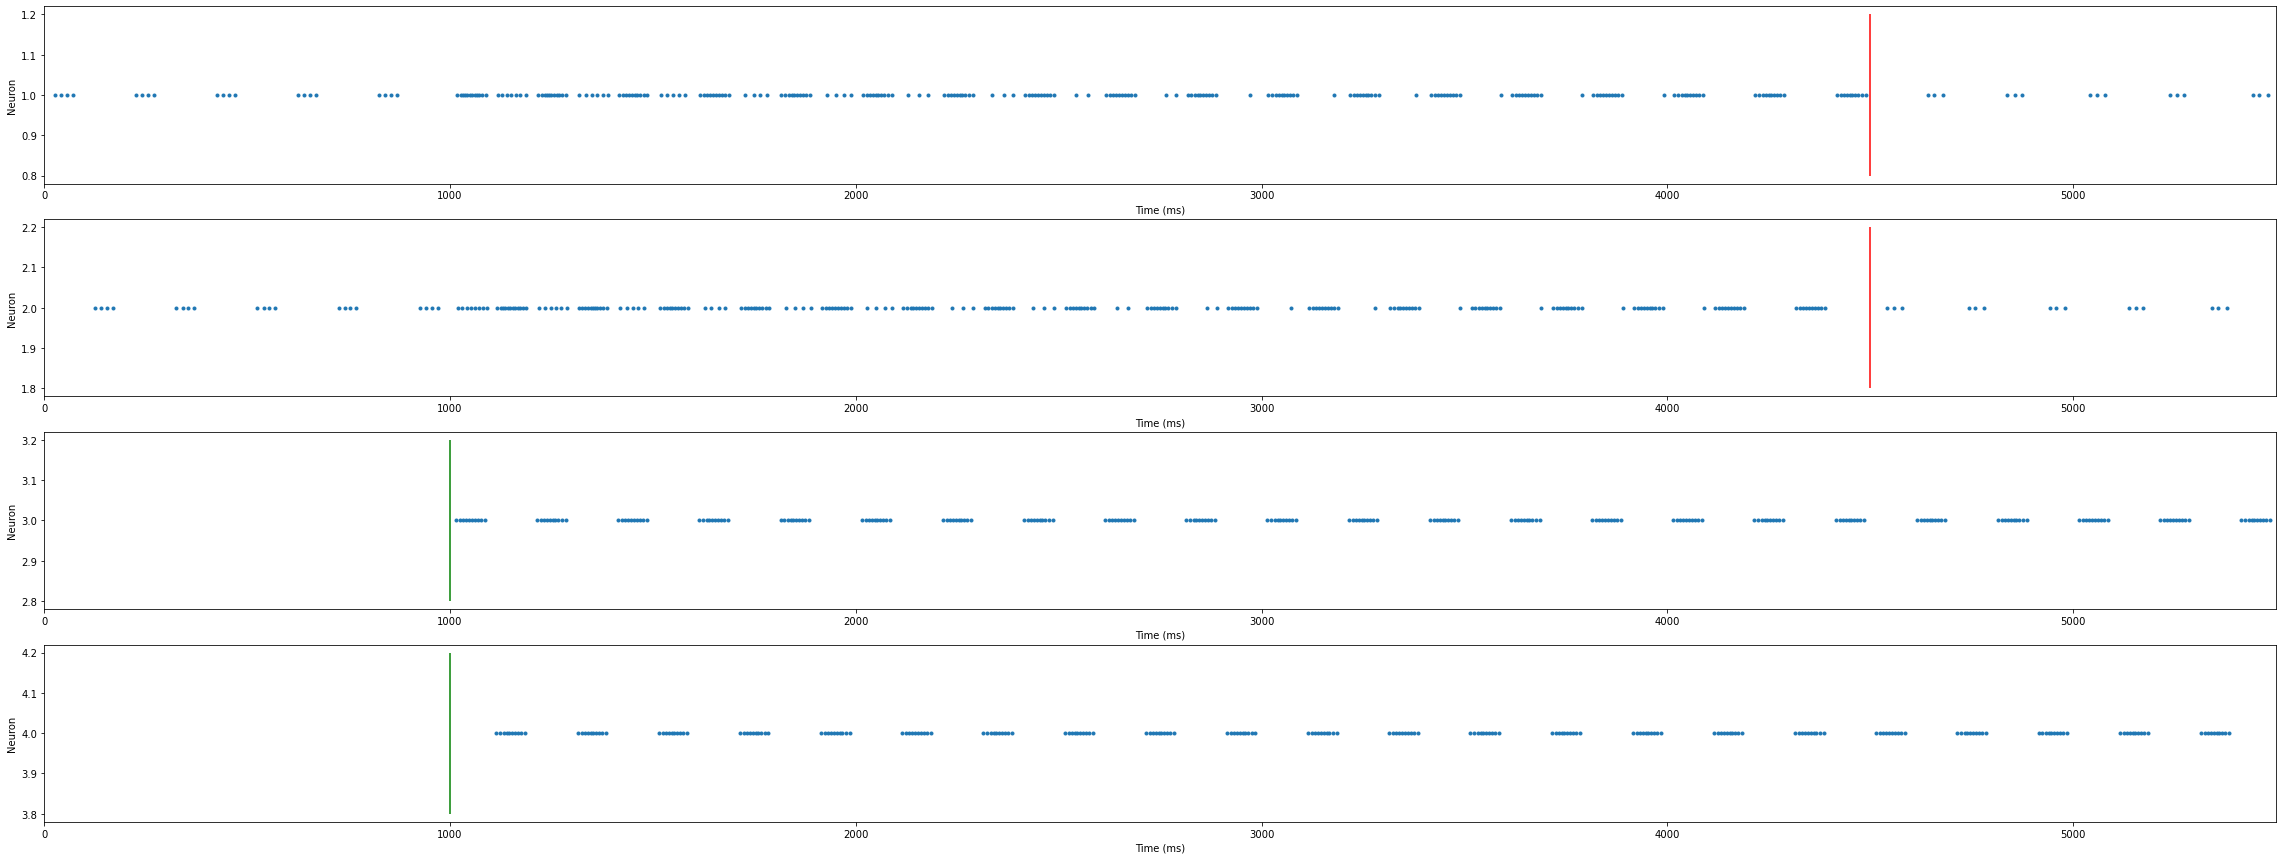

In [733]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1,figsize=(40, 15),facecolor='w')

ev = sim.GetStatus(n1_spikes)[0]['events']
t = ev['times']
sp = ev['senders']
plotSpks(ax1,t,sp)

ev = sim.GetStatus(n2_spikes)[0]['events']
t = ev['times']
sp = ev['senders']
plotSpks(ax2,t,sp)

ev = sim.GetStatus(n3_spikes)[0]['events']
t = ev['times']
sp = ev['senders']
plotSpks(ax3,t,sp)

ev = sim.GetStatus(n4_spikes)[0]['events']
t = ev['times']
sp = ev['senders']
plotSpks(ax4,t,sp)

# ev = sim.GetStatus(m1)[0]['events']
# t = ev['times']
# Vm = ev['V_m']
# ax1.plot(t,Vm)
# ax1.set_ylabel('Membrane potential (mV)')
# ax1.set_xlabel('Time (ms)')
# ax1.set_xlim([0,sim_len])

# ev = sim.GetStatus(m2)[0]['events']
# t = ev['times']
# Vm = ev['V_m']
# ax2.plot(t,Vm)
# ax2.set_ylabel('Membrane potential (mV)')
# ax2.set_xlabel('Time (ms)')
# ax2.set_xlim([0,sim_len])

# ev = sim.GetStatus(m3)[0]['events']
# t = ev['times']
# Vm = ev['V_m']
# ax3.plot(t,Vm)
# ax3.set_ylabel('Membrane potential (mV)')
# ax3.set_xlabel('Time (ms)')
# ax3.set_xlim([0,sim_len])

# ev = sim.GetStatus(m4)[0]['events']
# t = ev['times']
# Vm = ev['V_m']
# ax4.plot(t,Vm)
# ax4.set_ylabel('Membrane potential (mV)')
# ax4.set_xlabel('Time (ms)')
# ax4.set_xlim([0,sim_len])


ax1.vlines(stp_tm, 0.8, 1.2, colors='r')
ax2.vlines(stp_tm, 1.8, 2.2, colors='r')
ax3.vlines(srt_tm, 2.8, 3.2, colors='g')
ax4.vlines(srt_tm, 3.8, 4.2, colors='g')